$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\di}[0]{\text{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\cplxi}[0]{\text{i}}$
$\newcommand{\unit}[1]{\mathbf{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\with}[0]{\quad\text{with}\quad}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\text{and}\quad}$
$\newcommand{\oreq}[0]{\quad\text{or}\quad}$

In [46]:
from IPython.display import Image, display, YouTubeVideo
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
from ipywidgets import interact, FloatSlider, fixed
from matplotlib import rcParams
interactive(True)
rcParams['figure.dpi'] = 150  # for crisper figures later

*Readings:*

* *Morin 4.4*
* *French Chapter 4*



# Expectations

## Remember:

* If an oscillator is driven at angular frequency $\omega$, then the oscillator also oscillates at angular frequency $\omega$, no matter what its value of $\omega_0$ and $\gamma$ are.
* If the oscillator is driven at $\omega \approx \omega_0$, then the oscillator resonates, i.e., it amplifies the oscillations of the driver.
* At resonance, the amplitude of the oscillations is approximately equal to the amplitude of the forcing multiplied by $Q$: $A \approx QA_f/2$,
* When $\omega < \omega_0$, driving and oscillator oscillate in phase (think of the spring that is barely stretched or compressed), when $\omega > \omega_0$, driver and oscillator are in phase opposition, and when $\omega \approx \omega_0$, the oscillator lags the driver by a quarter cycle ($\pi/2$).
* The resonance frequency is exactly $\omega_0$ because it is where the peak in velocity response and power absorption are both located.
* The full width at half height, how to recognize it in a power curve, and that $\omega_{fwhh} \approx \gamma$.
* The trade-off between the amplification that is proportional to $Q$, and the FWHH, which goes as $1/Q$ (recall: $\omega_{fwhh} \approx \gamma = \omega_0/Q$).

## Understand:

* Testing for $x = A \cos(\omega t - \delta)$ is validated by finding expressions for $A$ and $\delta$ that would satisfy the nonhomogeneous ODE.
* How we use the rule that $$ A\cos(\omega t) + B\sin(\omega t) = C \cos(\omega t) \thrfor A = C\quad \textrm{and}\quad B = 0$$
to obtain the curves for $A(\omega)$ and $\delta(\omega)$.
* The connection between the transient and forced responses being superposed, and the mathematical result that the solution to a nonhomogeneous ODE is the sum of the complementary and particular solutions.

## Apply

* See worked examples, tutorials and problem sets.

# Recap of the undamped case

* Reminisce again about what it is to play on a swing set:
    * Drop from a certain angle and stay still on the swing: you are oscillating are the natural angular frequency $\omega_0$, or more realistically, at the damped angular frequency $\omega_d$ (swings sets are popular because damping is not very high, so, $\omega_0 \approx \omega_d$).
    * Move your legs much less frequently than this frequency ($\omega \ll \omega_0$): you don't get very far, and your legs are in phase with your angle, that is, legs forward, you go forward, and vice-versa.
        Your angle has a phase shift $\delta= 0$ with your legs.
        It's hard to realize but if you have a swing set nearby, try it.
    * Move your legs a lot faster such that $\omega \ll \omega_0$ that and once again, you don't go very far.
        Pay real close attention and you will notice that your legs and your position are out-of-phase: your angle has a phase shift $\delta= \pi$ with your legs.
        It's even harder to realize than in the low-frequency case because it's harder to concentrate, but it's true.
    * Move your legs at about $\omega \approx \omega_0\approx \omega_d$ (swings sets are popular because damping is not very high), and you will start going real high.
        Notice that instinctively, you flip the direction of your legs when your position is maximum.
        That is, it is when you are on top of your trajectory, facing the ground, that you flip your legs from below the seat to forward.
        They will be at maximum forward extension when you pass the vertical plane (zero angle), and will keep this 1/4-cycle advance ($\delta = \pi/4$) on your position as long as you resonate.

As tough as the math gets, all the physics you need to understand for now is encapsulated in these scenarios!
Here is a demo though (at at https://youtu.be/Is7shffFJFs), where I repeat these points.

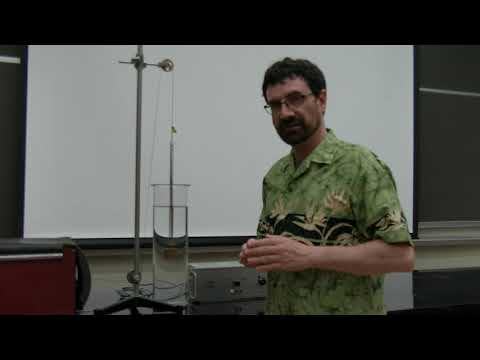

In [47]:
YouTubeVideo('Is7shffFJFs', width=560, height=300)

Mathematically, we determined that we needed to solve an inhomogeneous ODE, with the LHS being the SHO equation, and the RHS being the forcing.
Switching to complex notations, this ODE was
$$ \boxed{\ddot z + \omega_0^2 z = \omega_0^2A_f\eexp{\cplxi\omega t}},$$
with $z \in \mathbb C$ and $\text{Re}(z) = x$.
We let out previous problem adopt an exponential, $z = Z\eexp{rt}$, and found
\begin{equation}
    Z = \frac{\omega_0^2 A_f}{\omega_0^2 - \omega^2}.
    \label{eq:ZinCundamp}
\end{equation}

For **low frequencies**, i.e., $\bs{\omega}$ < $\bs\omega_0$, the response was 
$$x(t) = \text{Re}(z) = A(\omega)\cos(\omega t), \with A(\omega) = \frac{\omega_0^2 A_f}{\omega_0^2 - \omega^2},$$
for **high frequencies**, $\bs{\omega}$ > $\bs\omega_0$, the response was
$$x(t) = \text{Re}(z) = A(\omega)\cos(\omega t - \pi), \with A(\omega) = \frac{\omega_0^2 A_f}{\omega^2 - \omega_0^2},$$
and at **resonance**, the response was
\begin{equation}
    x(t) = \frac12 A_f\omega_0 t \cos\left(\omega_0 t - \frac\pi2\right).
    \label{eq:xResUndamped}
\end{equation}

We didn't derive it so no worries if you don't know where it comes from. The most interesting piece of info was the $-\pi/2$ phase shift, namely, the position is a quarter-cycle behind the forcing, just like on the swing set.
And the second-most interesting piece of info was that the amplitude increased linearly with time, seemingly without end...

... Or not? Let's think about it: as the amplitude gets larger and larger, so does the velocity.
There will come a time when the hypothesis of no damping will be egregiously wrong.
So, let's reintroduce it.

# Driving a damped oscillator

Adding damping adds a few differences with the previous, undamped case.
In short, the mathematically weird stuff in the previous solution gets regularized: the weird jump in phase from $0$ to $\pi$ and the diverging amplitude get a more physical treatment.

You know the drill: FBD with a moving wall, dividing by the mass, rearranging to let the free part of the equation or the LHS and leaving the forcing on the RHS yields
$$ \ddot x + 2\gamma \dot x +\omega_0^2x = \omega_0^2 A_f\cos(\omega t). $$ 

Once again, we will focus on the particular solution, for the same reasons as before.
This is even more justified because with damping, the homogeneous solution would eventually die.
We will come back to it.

Before adopting an exponential, let's move to the complex space,
$$\ddot z + 2\gamma \dot z + \omega_0^2 z = \omega_0^2 A_f \eexp{\cplxi \omega t},$$

Let it adopt an exponential $z = Z\eexp{rt}$ and just like for the undamped case, you quickly obtain
$$r = \pm\cplxi \omega \andeq \left(-\omega^2 +2 \cplxi \gamma \omega + \omega_0^2\right) Z = \omega_0^2 A_f,$$
or
$$Z = \frac{\omega_0^2 A_f}{\omega_0^2 - \omega^2 +2 \cplxi \gamma \omega}.$$
Technically, we solved the problem with this, a computer could just plot the magnitude and phase of this for us.
But let's try to understand this solution with pen-and-paper.

The algebra that follows can be intimidating because the terms are so big, so let me introduce a few intermediate quantities.
Let $p = \omega_0^2 - \omega^2$, $q = 2\gamma\omega$, after which $Z$ becomes
$$Z = \frac{\omega_0^2 A_f}{p+\cplxi q}.$$

The next step is to figure out the magnitude of $Z$, because it will tell us how far the mass goes given a certain forcing, and the phase, and we both know from before that they depend on the driving frequency $\omega$.
So, like before, let's use a polar representation $Z = A(\omega)\eexp{-\cplxi\delta(\omega)}$ and crank the algebra machine up.
The amplitude is the easiest, with
$$|Z| = \frac{\omega_0^2 A_f}{\sqrt{p^2 + q^2}} = \boxed{A(\omega) = \frac{\omega_0^2 A_f}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\gamma^2 \omega^2}}}.$$
Notice something on the denominator?
Inside the square root, you see the sum of two squared real expressions that are zero for different $\omega$'s, and whose sum is therefore never zero.
The denominator is therefore always positive now, the amplitude never diverges to infinity!

For the phase, I find it easier to decompose $Z/A(\omega)$ into real and imaginary parts to obtain the cos and sin.
This is like finding the real and imaginary parts of the division of two complex numbers, which we saw in lecture 02:
$$Z = \frac{\omega_0^2 A_f}{p + \cplxi q}\frac{p - \cplxi q}{p - \cplxi q} = \frac{\omega_0^2 A_f(p - \cplxi q)}{p^2 + q^2}.$$

To get the cos and sin of the phase, we divide this by $A(\omega)$ to obtain
$$\frac{Z}{A} = \eexp{-\cplxi \delta} = \cos\delta - \cplxi\sin\delta = \frac{p}D - \cplxi \frac{q}{D}.$$
Because $p$, $q$ and $D$ are all real, identifying the real and imaginary parts is easy, it's just
$$\cos\delta = \frac{p}{\sqrt{p^2 + q^2}} \andeq \sin\delta = \frac{q}{\sqrt{p^2 + q^2}}.$$

Before unpacking what will probably be a voluminous expression, let's see if the tangent of the phase would be enough.
I am educating this guess with two pieces of information:
* In the undamped case, the phase was 0 or $\pi$. We could hope that our phase would be in the same $[0, \pi)$ bracket, and therefore the knowledge of $\cos\delta$, $\sin\delta$ or $\tan\delta$ alone would be enough to know $\delta$.
* I already know the answer: it works.

After all of this tension, let us reveal the phase shift with respect to the forcing, namely,
$$\tan \delta = \frac{\sin\delta}{\cos\delta} = \frac qp = \frac{2\gamma \omega}{\omega_0^2 - \omega^2} \thrfor \boxed{\delta(\omega) = \arctan\left(\frac{2\gamma\omega}{\omega_0^2 - \omega^2}\right)}.$$

Notice that the denominator isn't defined when $\omega_0 = \omega$.
That's OK, just recall that when $\omega = \omega_0$, $p = 0$, and therefore,
$\cos\delta(\omega=\omega_0) =0$, $\sin\delta(\omega = \omega_0) = q/\sqrt{0^2 +q^2} = +1$, and therefore, $\delta = \pi/2$... like on the swing set, again!

In terms of units, the numerator of $A(\omega)$, $\omega_0^2 A_f$ is in units of $[L][T]^{-2}$. The denominator $\sqrt{(\omega^2 - \omega_0^2)^2 + \dots}$ is in units of $[T]^{-2}$, so $A$ is in units of length indeed. Similarly for $\tan \delta$, $2\gamma\omega$ is in units of $[T]^{-2}$, same as the denominator of the tangent, $\omega_0^2 - \omega^2$.

Let us study the behaviour of the solution $x = A(\omega)\cos\left[\omega - \delta(\omega)\right]$ for different frequencies.

# Transient Response

The solution we computed was valid after the oscillations had time to establish themselves.
Initially though, there is always a transient phase, during which multiple forms of motion coexist.
See for example the video below (Jupyter) or at https://youtu.be/IEve6in-eUg and https://play.library.utoronto.ca/ca2d0e98c625262852fedb6dbf68bbbf.

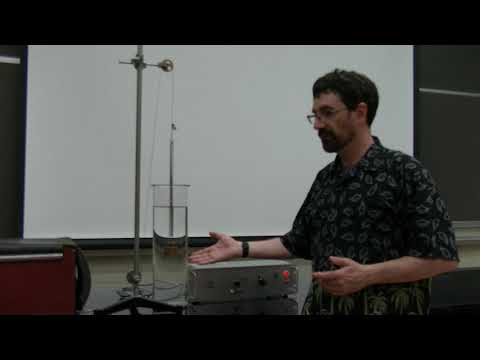

In [14]:
YouTubeVideo('IEve6in-eUg', width=560, height=315)

To clarify, recall that the forced ODE is an inhomogeneous ODE, meaning that the total solution is the sum of a particular solution $x_p$, and of the homogeneous solution $x_h$.
The general solution is then written
$$x = x_h + x_p.$$

* We computed $x_h$ during lecture 4, it is simply the free response, i.e., the one without forcing
    $$x_{h} = A_{h}\eexp{-\gamma t}\cos(\omega_d t + \phi),$$
    assuming we know the initial conditions, 
* We computed $x_p$ in this lecture, 
    $$x_p = A(\omega) \cos(\omega t - \delta(\omega)).$$


Then, $\boldsymbol{x = x_{p} + x_{h}}$ **is indeed also a solution of** $\boldsymbol{\ddot x +\gamma \dot x + \omega_0^2 x = A_f\cos(\omega t)}$, as you can fairly easily check by just plugging in the above solution into the full equation of the forced problem.

What does it mean physically?
It means that, for example, if an engine is started from 0 to 100% instantly (*step response*, cf. control theory), there will be an initial vibration on top of the engine natural frequencies, which will linger until dissipation removes it.

Also, because $\omega_d \neq \omega$ in general, the two oscillations might look in phase at some time, and out-of-phase at other times, creating a "beating" phenomenon, which we will talk more about when we talk about coupled oscillators. 
It was visible in both class demos I shared in this chapter (the second one being dedicated to it), in which I had to wait for a while every time I would change the frequency.
I also plot an example here (fig. 7).

In [59]:
def plot_transient():
    # Let's plot an example
    Q = 20.
    gamma = omega_0/Q
    omega_d = omega_0*np.sqrt(1. - 1/Q**2)
    omega = omega_0*1.2
    t = np.linspace(0, 15., 1024)

    Amp = omega_0**2/((gamma*omega)**2 + (omega_0**2 - omega**2)**2)**.5
    delta = np.arctan(gamma*omega/(omega_0**2 - omega**2))
    if delta<0:  # arctan only outputs results in [-pi/2, pi/2]; need to add some phase
        delta += np.pi
    x_forced = Amp*np.cos(omega*t - delta)

    x_free = Amp*np.exp(-0.5*gamma*t)*np.cos(omega_d*t)  # I set both amplitudes to the same

    x_tot = x_free + x_forced
    xmax = max(x_tot)

    x_tot /= xmax
    x_forced /= xmax
    x_free /= xmax

    plt.figure()

    plt.subplot(311)
    ax1 = plt.gca()
    ax1.plot(t, x_free)
    ax1.set_title('All distances are divided by $\max(x)$')
    ax1.set_ylabel('$x_{free}$', fontsize=ftsz)
    ax1.set_ylim([-1., 1.])
    ax1.grid()

    plt.subplot(312)
    ax1 = plt.gca()
    ax1.plot(t, x_forced)
    ax1.set_ylabel('$x_{forced}$', fontsize=ftsz)
    ax1.set_ylim([-1., 1.])
    ax1.grid()

    plt.subplot(313)
    ax1 = plt.gca()
    ax1.plot(t, x_tot)
    ax1.set_ylabel('$x$', fontsize=ftsz)
    ax1.set_xlabel('$t$ [s]', fontsize=ftsz)
    ax1.grid()

    plt.tight_layout()
    return

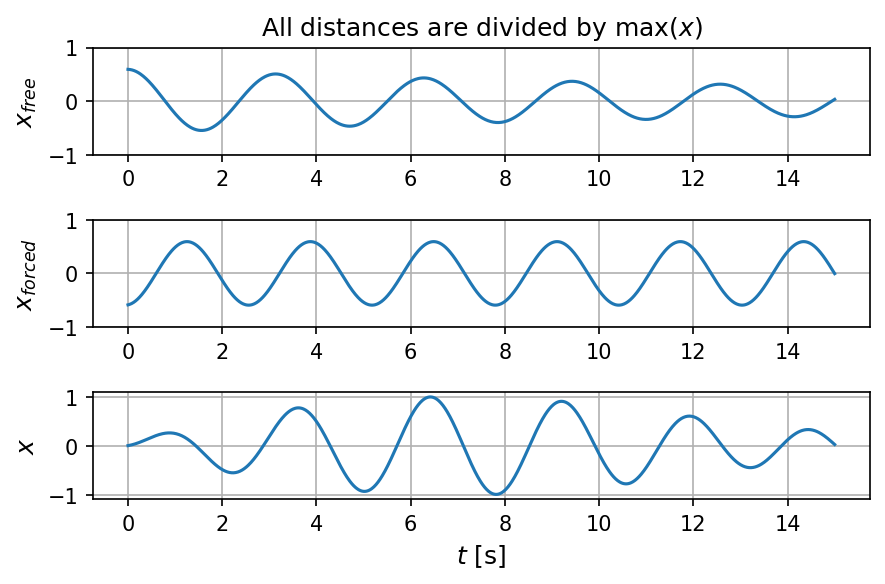

In [60]:
plot_transient()

# Varying the forcing frequency

Let's plot first and further analyze our analytical formulas after.

In [48]:
A_f, omega_0 = 0.25, 2.  # to illustrate
T_0 = 2*np.pi/omega_0
t = np.linspace(0, 6*T_0, 1024)  # time array
omega_array = np.linspace(0.01*omega_0, 3*omega_0, 256)  # array of angular frequencies
ftsz = 12

In [49]:
def plot_A_delta(Q):
    """ We normalize the amplitude by A_f """
    gamma = omega_0/Q
    A0 = 0.5*Q
    Amax = 0.5*Q * (1 - Q**-2)**-.5  # see calculation after the plot

    Z = omega_0**2 * A_f / ((omega_0**2-omega_array**2 + 2j*gamma*omega_array))
    A = abs(Z)
    # A_f*ps.omega_0**2/sqrt((gamma*omega_array)**2 
    #                        + (ps.omega_0**2 - omega_array**2)**2)
    delta = -np.angle(Z) # arctan(gamma*omega_array/(ps.omega_0**2 - omega_array**2))
    # arctan only outputs results in [-pi/2, pi/2]; need to add some phase
    # delta[delta<0] += pi

    plt.figure()

    # the sub-plot for the amplitude
    plt.subplot(211)  
    ax1 = plt.gca()
    # plotting the non-dimensional amplitude
    ax1.plot(omega_array/omega_0, A/A_f, 'b')
    ax1.axvline(1., color='k', linestyle='--')  # the omega = omega_0 mark
    ax1.plot([0.45, 0.95], [Amax, Amax], 'b--')
    ax1.text(0.43, Amax, '$A_{max}$', fontsize=ftsz, color='b', ha='right')
    ax1.set_xlabel('$\omega/\omega_0$', fontsize=ftsz) 
    ax1.set_xlim((0., 3))
    ax1.set_ylabel(r'$A(\omega)/A_{\!f}$', fontsize=ftsz)
    ax1.set_yticks([1., 5., 10.])
    ax1.grid()

    # the sub-plot for the phase
    plt.subplot(212)  
    ax2 = plt.gca()
    ax2.plot(omega_array/omega_0, delta, 'r')  # plotting the phase
    ax2.axvline(1., color='k', linestyle='--')  # the omega = omega_0 mark
    ax2.set_xlabel('$\omega/\omega_0$', fontsize=ftsz) 
    ax2.set_xlim((0., 3))
    ax2.set_ylabel(r'$\delta(\omega)$ [rad]', fontsize=ftsz)
    ax2.set_ylim([-0.1*np.pi, 1.1*np.pi])
    ax2.set_yticks([0., 0.5*np.pi, np.pi])
    ax2.set_yticklabels(['$0$', r'$\frac{\pi}{2}$', '$\pi$'], fontsize=ftsz)
    ax2.annotate(text='$\omega=\omega_0$', xy=(1., 0.5*np.pi), xytext=(1.15, 0.6*np.pi),
                 arrowprops=dict(arrowstyle='->'), fontsize=ftsz)
    ax2.text(0.01, np.pi/10., '$F$, $x$ in phase', fontsize=ftsz, color='r')
    ax2.text(2., np.pi*0.84, '$F$, $x$ out of phase', fontsize=ftsz, color='r')
    ax2.text(0.45, np.pi*0.55, '$x$ lags $F$', fontsize=ftsz, color='r')
    ax2.grid()
    
    return

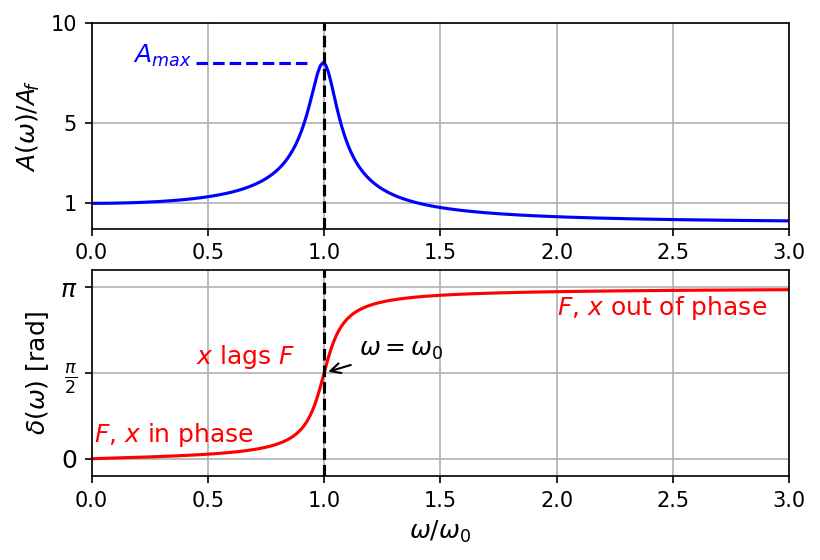

In [50]:
plot_A_delta(16.)  # Quality factor of 16, like in the previous lecture.

### Limit behaviour

* At **very low frequency**, 
    $$\lim_{\omega\to 0}A = \frac{\omega_0^2 A_f}{\sqrt{(\omega_0^2 - 0^2)^2 + 4\gamma^2 \times 0^2}} = A_f,$$
    the forcing amplitude.
    $$\lim_{\omega\to 0}\delta = \arctan(0) = 0.$$
    We find the same results as in the undamped case.

* At **very high frequency**, $\omega \gg \omega_0$
    $$A \approx \frac{\omega_0^2 A_f}{\sqrt{\omega^4 + 4\gamma^2 \omega^2}}\approx \frac{\omega_0^2 A_f}{\omega^2} \to 0,$$
    and
    $$\tan\delta \approx \frac{2\gamma}{-\omega} \to 0_- \thrfor \lim_{\omega\to\infty}\delta = \pi,$$
    the "-" subscript under $0_-$ meaning that $\tan\delta$ approaches zero from the negative side (better seen on a graph of $\tan(x)$, see e.g. Wikipedia), which means that $\delta \to -\pi$.
    Again, we find the same results as in the undamped case.
    
* At $\bs{\omega = \omega_0}$,
    $$A = \frac{\omega_0^2 A_f}{\sqrt{4\gamma^2 \omega_0^2}} = \frac{QA_f}{2} \andeq \delta = \frac\pi2.$$
    

## Maxima of the curves and resonance location

### Position $x$

From the figure above, it looks as if the maximum amplitude, i.e., resonance, happens for $\omega = \omega_0$.
A closer inspection of $A(\omega)$ reveals that it is not the case.
The numerator of $A(\omega)$ is a constant.
We can therefore find the maximum of $A(\omega)$ by finding the minimum of its denominator.
And because the denominator is a square root that is always positive, it is even more simple to find the minimum of the denominator squared:
$$\ode{\left[4\gamma^{2} \omega^{2} + (\omega_{0}^{2} - \omega^{2})^2\right]}\omega = 4\omega\left(2\gamma^2 - ( \omega_0^2 - \omega^2)\right).$$
The quantity above is zero if $\omega=0$ (uninteresting) or 
$$\omega^2 =\omega_{max}^2 = \omega_0^2 - 2\gamma^2 = \omega^2_0\left[1-\frac2{Q^2}\right].$$

The maximum amplitude is found when $\omega = \omega_{max}$, 

$$ A(\omega_{max}) = A_{max} = \frac{Q}{2\sqrt{1 - 1/Q^2}}A_f. \qquad (3) $$
*(I will let you do the intermediate steps.)*

In the $Q\to\infty$ (damping $\to 0$) limit, $\omega_{max} = \omega_0$ and $A_{max} = QA_f/2$.
But in any case, $\omega_{max} < \omega_0$.

In the case of a lightly-damped oscillator, $\omega_d > \omega_{max}$.
You would be excused to have intuited that $\omega_{max} = \omega_d$, the pseudo-frequency of the oscillations.
After all, my qualitative explanation of resonance at the beginning of the chapter implied that resonance happens when the forcing "kicks" in sync with the free oscillations, which you would think happens every $T_d$.
As it turns out, it is not exactly the case.
Nonetheless, the plots above are for $Q=16$, which is not that big a quality factor, and yet, it is very hard to distinguish $\omega_0$ from $\omega_{max}$ and presumably from $\omega_d$.

Besides, when $Q$ is not big, damping is so strong that resonances are not very pronounced.
Therefore, **for all practical purposes,** $\boxed{\omega_{max} \approx \omega_0}$ **and** $\boxed{A_{max} \approx QA_f = F_0 Q/k}$.

## Velocity

For the velocity, things are actually a bit easier to remember.
If $x = A(\omega)\cos\left[\omega t - \delta(\omega)\right]$, then 
$$v = -\omega A(\omega) \sin\left[\omega_t - \delta(\omega)\right] = +V(\omega) \cos\left[\omega_t - \delta(\omega) + \frac\pi2\right],$$
having used $\cos(\theta + \pi/2) = -\sin\theta$ and with 
$$V(\omega) = \omega A(\omega) = \frac{\omega\omega_0^2 A_f}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\gamma^2 \omega^2}} = \frac{\omega_0 A_f}{\sqrt{\left(\frac{\omega_0}{\omega} - \frac{\omega}{\omega_0}\right)^2 + \frac{4\gamma^2}{\omega_0^2}}}$$
the velocity amplitude.
The last "=" sign, I divided both the numerator and the denominator by $\omega\omega_0$.

This says a few things.

* At very low frequency, $V(\omega) \to 0$: you may be following the position of your legs on your swing, but your are not going very fast.
* **The maximum of $V(\omega)$ actually happens at $\bs{\omega = \omega_0}$**. No need to take any derivative, just stare the expression for $V(\omega)$ in the eyes, don't blink, and follow my reasoning.
    The numerator is constant so $V$ is maximum when the denominator is minimum.
    And because $4\gamma^2/\omega_0^2$ is constant, the denominator is minimum when $\left(\omega_0/\omega - \omega/\omega_0\right)^2$ is minimum.
    And because the latter is the square of something real, it is minimum when it is zero, i.e., when $\omega = \omega_0$.
    This is why, after all this fuss and calculating all of these $\omega_d$'s and other $\omega_{max}$'s, **we define the resonance frequency to be $\omega_0$.** Not by convenience actually. It will correspond to the frequency at which the most energy is absorbed by the oscillator, as we are about to see.
* The phase shift by $\pi/2$ means that the new phase lag between forcing and velocity response is $\delta - \pi/2$.
    This means that **at resonance, velocity and forcing are exactly in phase**. This also has energetic implications, as we are about to see.

# Power Absorbed by Damping During Forced Oscillations

## Derivation

As the operator of an oscillating device, you may want to know how much power you need to supply to the device to sustain a given oscillation.
When the regime is stationary, i.e., when the transient has subsided and the oscillations have a steady amplitude, then you are supplying as much power to the system as the system dissipates power.
Therefore, as paradoxical as it may sound, knowing how much the system dissipates under a given oscillatory regime tell us directly how much power we need to supply to that oscillation.

This can also be useful, for example to test the limits of a device:
if one knows that all this damping is just friction, i.e., mechanical energy is turned into internal energy via microscopic heat transfer, then we can convert this heat transfer into temperature, and keep overheating in check.

With damping, we just saw that even at resonance, the amplitude is always finite.
We also saw in the last chapter that damping removed mechanical energy from the system, following $\dot E = \vec F_{damping}\cdot \vec v = -bv^2$.

Off-resonance, dissipation is not needed to explain why stationary oscillating forcing does not mean that the amplitudes will grow forever.
It is just the consequence of the forcing, working *with* the motion during parts of the cycle (it provides the oscillator with energy), and *against* it during some other parts (it takes energy back).

During stationary oscillations (that is, after the transient phase has subsided), at resonance, damping provides the energy sink necessary to keep the oscillations to a finite amplitude. 
Let us compute how much energy is absorbed by damping, not just at resonance, but at any frequency.

Power is usually of the form $\vec F \cdot \vec v$, therefore, we'll need the velocity response:
$$ v(t) = \dot x(t) = -\omega A(\omega)\sin(\omega t - \delta) = -V(\omega)\sin(\omega t - \delta),$$
with
$$ V(\omega) = \frac{\omega^2_0 \omega}{\sqrt{\gamma^{2} \omega^{2} + (\omega_{0}^{2} - \omega^{2})^2}}A_f, $$
the amplitude of the velocity response (recall that an amplitude should be defined positive, although ultimately, people do what they want).

The energy loss per second due to damping is $-\dot E(\omega, t) = P(\omega, t) = bv^2 = bV^2(\omega)\sin^2\left( \omega t -\delta \right)$.

*Note: again, the minus sign is for accounting purposes: $\dot E$ is the energy gain per second, and a negative gain corresponds to an energy loss. $-\dot E = P(\omega, t)$ is the energy loss per second, positive when the system loses energy... My notation, other people will follow other rules.*

This quantity varies over time, which makes sense: friction doesn't act when the mass is at rest, or resistor doesn't resist when the current is zero.

Nonetheless, it is not necessarily useful to have this much information about the time evolution, and very often, we just want to know the *average* power drain (the one billed by your energy company), which can be defined as the average over one cycle.
I will denote such an average quantity with a bar, and define it mathematically as
$$ \overline P(\omega) = \frac1T\int_{t_0}^{t_0+T}P(\omega, t)\di t, \quad \textrm{with} \quad T = \frac{2\pi}{\omega}.$$

In our case, the only time-dependent piece of $P(t)$ is $\sin(\omega t - \delta)$. 
With the change of variable $\omega t \to y$, $\di t \to \di y/\omega$, we have
$$ \int_{t_0}^{t_0+T} \sin^2(\omega t - \delta)\di t = \frac1\omega \int_{\omega t_0}^{\omega t_0 + 2\pi} \sin^2(y -\delta)\di y = \frac\pi\omega = \frac T2.$$
In the calculation above, I used  the fact that for $\sin$, shifting either the lower integration bound ($\omega t_0$) or the phase ($\delta$) does not change the integral over a full period.

Therefore, 

\begin{align*}
    \overline P(\omega) & = \frac b2\frac{\omega^4_0 \omega^2}{\gamma^{2} \omega^{2} + (\omega_{0}^{2} - \omega^{2})^2}A_f^2  = \frac{\gamma m}2\frac{\omega^2}{\gamma^{2} \omega^{2} + (\omega_{0}^{2} - \omega^{2})^2}\frac{F_0^2}{m^2} \\
                        & = \frac{F_0^2}{2 m}\frac{\gamma }{\gamma^{2} + (\omega_{0}^{2}/\omega - \omega)^2} \hspace{8cm} (4)
\end{align*}

after division of numerator and denominator by $\omega^2$.

Like for the amplitude of the position, $\lim_{\omega \to \infty} \overline P(\omega) = 0$.
But unlike $A(\omega)$, $\lim_{\omega \to 0} \overline P(\omega) = 0$ as well: when the driving is super slow, friction does not work.

And guess for which frequency does the maximum absorption by friction happen?
It is actually hard to guess, because whenever such a question arises, the answer is usually near $\omega_0$, but not quite, and never in the same way.
But here, hooray! The answer is exactly what we expect.
Indeed, $\max(\overline P(\omega))$ happens when the denominator is minimum, i.e., when $\omega = \omega_0$. 

**Friction absorbs the most energy when** $\bs{\omega = \omega_0}$ **exactly. (!!!)**

No approximation this time.
At this frequency, the power absorbed is 
$$\overline P_{max} = \frac{F_0^2}{2\gamma m} = \frac{F_0^2}{2 b} = \frac{Q A_f^2}.$$

For this reason, and because $\omega_0$ is much simpler to remember than $\omega_{max}$ or $\omega_d$, **the natural frequency** $\bs{\omega_0}$ **is the one that is called the resonance frequency.**

In [16]:
# Let's plot!
# we re-use all the quantities of A(omega)
Q = 12  # quality factor (lightly damped oscillator)
gamma = ps.omega_0/Q
b = ps.m*gamma
F0 = ps.omega_0**2*ps.A_f**2
Pmax = 0.5 * F0**2 / b

# Note: I divide P by A_f**2 directly
P = 0.5*F0**2/ps.m * gamma/(gamma**2 + (ps.omega_0**2/omega_array - omega_array)**2)

plt.figure()
ax1 = plt.gca()

# plotting the power curve
ax1.plot(omega_array, P, 'b')  # plotting the non-dimensional power
ax1.axvline(1.*ps.omega_0, color='k', linestyle='--')  # the omega = omega_0 mark
ax1.text(0.98*ps.omega_0, 1.02*Pmax, '$\overline{P} = \overline{P}_{max}$',
         fontsize=ftsz, color='b', ha='right')
ax1.axhline(0.5*Pmax, color='k', linestyle='--')  # the P = Pmax/2 mark
ax1.text(0.8*ps.omega_0, 0.52*Pmax, '$\overline{P} = \overline{P}_{max}/2$',
         fontsize=ftsz, color='b', ha='right')
ax1.set_xlabel('$\omega$', fontsize=ftsz) 
ax1.set_ylabel(r'$\overline{P}\,(\omega)$ [W]', fontsize=ftsz)
ax1.set_yticks([0., .5*Pmax, Pmax])
ax1.set_xticks([om*ps.omega_0 for om in arange(0.1, 3., 0.1)])
ax1.set_xticklabels(["${0:.1f}\omega_0$".format(om) for om in arange(0.1, 3., 0.1)])
ax1.set_ylim([0., 1.1*Pmax])
ax1.set_xlim([0.6*ps.omega_0, 1.4*ps.omega_0])
ax1.grid()

# plotting the full width at half height
ax1.annotate(s='$\omega_{fwhh} = \gamma$',
             xy=((1-0.5/Q)*ps.omega_0, 0.5*Pmax), xytext=((1+0.69/Q)*ps.omega_0, 0.5*Pmax),
             arrowprops=dict(arrowstyle='<|-|>', color='r'),
             backgroundcolor='w', ha='left', va='center', 
             fontsize=ftsz, color='r')

plt.tight_layout()

plt.savefig('PowerDHO.png', dpi=100)
plt.close()

![Fig. 8: Power curve for a driven DHO.](PowerDHO.png)

**Recall that a power has the units of W (Watts), J.s**$^{\bs{-1}}$ **(Joules per second) or kg.m**$^{\bs{2}}$**.s**$^{\bs{-1}}$ **(SI base units), which are all the same.**

Another important parameter to characterize the resonance is the full width at half height of the curve, $\omega_{fwhh}$, which is best described graphically, as shown above (fig. 8).

There is no easy analytical expression for $\omega_{fwhh}$ if the full expression of $\overline P(\omega)$ is retained.
Instead, we can find an approximate form if $\omega \approx \omega_0$.
Around this frequency, most of the variations of $\overline P(\omega)$ are due to the $(\omega_0^2 - \omega^2)^2$ term in eqn. (4).
It means that we can approximate the expression of $\overline P$ by doing the following two things to eqn. (4):

* replace $\omega$ by $\omega_0$ almost everywhere,
* except in the $(\omega_0^2 - \omega^2)^2$ term. In this term, we approximate $\omega^2 - \omega_0^2 = (\omega - \omega_0)(\omega + \omega_0) \approx 2\omega_0\Delta\omega,$ with $\Delta\omega = \omega - \omega_0 \ll 2\omega_0$.

The result is
$$ \overline P(\omega) \approx \frac{F_0^2}{2 \gamma m}\frac{1}{1 + \frac{4(\Delta\omega)^2}{\gamma^2}} = \frac{ \overline P_{max} }{1 + \frac{4(\Delta\omega)^2}{\gamma^2}}. $$

It is now much easier to find an approximate expression for $\omega_{fwhh}$.
When $\overline P/\overline P_{max} = 1/2$, then $(\Delta\omega)_{fwhh}^2 \approx \gamma^2/4$.
Square-root and double that and you get
$$ \boxed{\omega_{fwhh} = 2\Delta\omega_{fwhh} \approx \gamma = \omega_0/Q.} $$

Consequently, if friction ($\gamma$) decreases, the power resonance curve becomes narrower (see fig. 9).
That is, with a high-$Q$ oscillator, it is much easier to "miss" resonance when adjusting the frequency. But when resonance is attained, the system dissipates a lot more power than in a high-damping case.
In this case, less damping means more energy dissipation (but only for $\omega \approx \omega_0$).

In [17]:
# we re-use everything

plt.figure()  # the figure for the amplitude
ax1 = plt.gca()

list_of_Qs = [.5, 1., 2., 4., 8.]

lnwt = 0.5
for Q in list_of_Qs:
    gamma = ps.omega_0/Q
    P = 0.5*F0**2/ps.m * gamma/(gamma**2 + (ps.omega_0**2/omega_array - omega_array)**2)
    ax1.plot(omega_array/ps.omega_0, P, 'b', linewidth=lnwt,
            label='$Q = {0:.2f}$'.format(Q))  # non-dimensional amplitude
    lnwt += 0.5

ax1.set_title('$\omega_0$ kept constant, $\gamma$ varied.')
ax1.set_xlabel('$\omega/\omega_0$', fontsize=ftsz) 
ax1.set_ylabel(r'$\overline{P}\,(\omega)$ [W]', fontsize=ftsz)
ax1.legend()
ax1.grid()

plt.savefig('PowerDHO_Q.png', dpi=100)
plt.close()

![Fig. 9: Power curves for driven DHOs with different $Q$](PowerDHO_Q.png)

Which brings us to a third interpretation of the quality factor $Q$, which is
$$ \boxed{Q = \frac{\omega_0}{\gamma} \approx \frac{\omega_0}{\omega_{fwhh}} = \frac{\textrm{resonance frequency}}{\textrm{full width at half-height of power curve}}.} $$

## Applications

### Spectra of Astrophysical bodies

Atoms and molecules resonate at certain frequencies, i.e., those that make their electrons jump levels. Atoms gorge themselves of the EM waves with which they resonate, and absorb so much power that the light of astrophysical bodies carries the signature of these resonances. This is how the chemical composition of the atmosphere of astrophysical bodies gets determined (see figs. 10 and 11).

![Fig. 10: The visible color spectrum, from 380 nm to 710 nm. The black lines are Fraunhofer lines, and correspond to frequencies that resonate with the molecules, present in the Sun's atmosphere. By Fraunhofer_lines.jpg: nl:Gebruiker:MaureenV Spectrum-sRGB.svg: Phrood Fraunhofer_lines_DE.svg: *Fraunhofer_lines.jpg: Saperaud 19:26, 5. Jul. 2005 derivative work: Cepheiden (talk) derivative work: Cepheiden [Public domain], via Wikimedia Commons](768px-Fraunhofer_lines.png)

![Fig. 11: Same as Fig. 1, coded in light intensity. Each dip is like an inverted power resonance curve. By Spectrum of blue sky.png : Remember the dot Derivative work : Eric Bajart (Spectrum of blue sky.png) [CC BY-SA 4.0-3.0-2.5-2.0-1.0 (http://creativecommons.org/licenses/by-sa/4.0-3.0-2.5-2.0-1.0)], via Wikimedia Commons](800px-Spectrum_of_blue_sky.png)

***

**Worked example: King p. 64.**

***

### The LCR Circuit

Whenever one wants to amplify a signal at a certain frequency, one wants to create a system with a resonance frequency that matches said frequency. If $Q$ is high enough, then the signal will be amplified by a factor $Q$. Indeed, take eqn. (3). For $Q\gg 1$, $A_{max} \approx Q A_f$.
One typical example is radio reception, which is realized with an LRC circuit (see next section).

Recall that 
\begin{align*}
    k & \leftrightarrow 1/C, \\
    m & \leftrightarrow L, \\
    b & \leftrightarrow R, \\
    \omega_0^2 = \frac km & \leftrightarrow \omega_0^2 = \frac1{LC}, \\
    \gamma = \frac bm & \leftrightarrow \gamma = \frac RL, \\
    Q = \frac{\omega_0}\gamma = \frac{\sqrt{km}}b & \leftrightarrow Q = \frac{\omega_0}\gamma = \frac1R\sqrt{\frac LC}. \\
\end{align*}

Applying this correspondence to the results we found for the mass+spring system, we have

\begin{align*}
    \ddot x +\gamma \dot x + \omega_0^2 x = \omega_0^2 A_f\cos(\omega t) & \leftrightarrow \ddot q + \gamma \dot q + \omega_0^2 q = V_0'\cos(\omega t), \\
    x(t) = \frac{\omega^2_0 A_f\cos(\omega t)}{\sqrt{\gamma^{2} \omega^{2} + (\omega_{0}^{2} - \omega^{2})^2}} & \leftrightarrow q(t) = \frac{V_0\cos(\omega t)}{L\sqrt{\gamma^{2} \omega^{2} + (\omega_{0}^{2} - \omega^{2})^2}}
\end{align*}
with $F_0' = F_0/m$ and $V_0' = V_0/L$, $V_0$ being the amplitude of the voltage applied 

For an LRC circuit, we can retrieve the amplified signal by measuring the voltage across the capacitor:
$$ V_C = \frac{q}{C} = \frac{V_0\cos(\omega t)}{LC \sqrt{\gamma^{2} \omega^{2} + (\omega_{0}^{2} - \omega^{2})^2}} = \frac{\omega_0^2 V_0 \cos(\omega t)}{\sqrt{\gamma^{2} \omega^{2} + (\omega_{0}^{2} - \omega^{2})^2}} $$ 

At resonance, $\omega = \omega_0$, then 
$$ V_C(\omega=\omega_0) = \frac{\omega_0^2 V_0 \cos(\omega_0 t)}{\sqrt{\gamma^{2} \omega_0^{2}}} = \frac{\omega_0 }{\gamma}V_0 \cos(\omega_0 t) = QV_0\cos(\omega_0 t). $$

For a radio signal, the generator is in fact radio waves, passing through the antenna, then being amplified by a factor $Q$ by the LCR circuit.
After which I am sure that some additional circuitery amplifies the signal some more.

It is important for a receiver to *not* have a $Q$ as high as possible. 
A really large $Q$ means more amplification, but also less room for error: having some width means that the amplification will happen even if the receiver is not set perfectly on $\omega = \omega_0$.

Perhaps more crucially, radio signals are not perfect sine functions, otherwise, there would be no extra information being carried.
The two main radio broadcasting methods are AM (amplitude modulation) and FM (frequency modulation), where a carrier wave, oscillating at $\omega$, gets its amplitude tweaked (AM) or frequency tweaked (FM). 
Both methods imply that the frequency constantly shifts, or develops additional frequencies that are close to $\omega_0$ but not quite.
A receiver needs to be able to catch these extra frequencies, and therefore to have some width.
Apparently, a typical value for $Q$ is 200.
See fig. 12 for an illustration.

![Fig. 12: Signal to be carried (top), AM signal (bottom) and FM signal (bottom). By Berserkerus (Own work) [CC BY-SA 2.5 (http://creativecommons.org/licenses/by-sa/2.5)], via Wikimedia Commons](Amfm3-en-de.gif)

# Summary

In this lecture, we saw the following.

* How adding a bit of friction changes the equation of motion of a free oscillator and the shape of the solutions, but how "adopt-an-exponential" still works fine.
* How there are three regimes when there is friction: underdamped (keeps oscillating but decays), overdamped (does not oscillate; friction is so large that the system barely moves, takes a while to decay), and critical (in-between case; fastest return to zero).
* Definition of the $Q$-factor, which compares how fast a system oscillates (if it oscillates) vs. how fast it decays.
* Driving an oscillator yields a response at the driving frequency, not the natural frequency.
    The amplitude is maximum when the two match (actually, without damping, it diverges), and there might be phase shifts between forcing a response.